In [31]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
from pathlib import Path

import matplotlib.pyplot as plt

In [32]:
import os
from zipline.data import bundles

In [33]:
current_dir = Path('.')
current_dir.absolute()

WindowsPath('G:/My Drive/Slate/Notes_G/Finance Job/python for finance')

In [34]:
df = pd.read_csv(current_dir.absolute() / 'quotemedia_data_May31.csv', header=[0, 1])
df.columns = [f'{col[0]}_{col[1]}' for col in df.columns]
df.drop(0, inplace=True)
df.rename(columns={'Price_Ticker' : 'Date'}, inplace=True)
df.head()

,Date,Adj Close_A,Adj Close_AAL,Adj Close_AAP,Adj Close_AAPL,Adj Close_ABBV,Adj Close_ABC,Adj Close_ABT,Adj Close_ACN,Adj Close_ADBE,...,Volume_XL,Volume_XLNX,Volume_XOM,Volume_XRAY,Volume_XRX,Volume_XYL,Volume_YUM,Volume_ZBH,Volume_ZION,Volume_ZTS
1,2013-07-01,28.463699,15.838058,74.229591,12.621668,26.622534,NaN,28.366257,59.305653,46.240002,...,NaN,NaN,13182200.0,684100.0,2170247.0,1479900.0,3013045.0,1260411.0,1440600.0,17601000.0
2,2013-07-02,28.137201,15.489241,73.848862,12.907585,27.006422,NaN,28.228590,59.322105,46.029999,...,NaN,NaN,12320700.0,894500.0,2358706.0,1432800.0,3218635.0,1230232.0,2435600.0,11157300.0
3,2013-07-03,28.189438,15.790919,74.320206,12.978834,27.019215,NaN,27.734631,59.782722,46.419998,...,NaN,NaN,5674000.0,809200.0,1817919.0,330300.0,2560414.0,506142.0,1828900.0,12930000.0
4,2013-07-05,28.881617,15.875768,74.855049,12.874584,27.332724,NaN,28.277182,60.572376,47.000000,...,NaN,NaN,8917900.0,572500.0,2426106.0,570100.0,2127256.0,441973.0,2995500.0,10819200.0
5,2013-07-08,28.966501,15.970046,75.888367,12.801483,27.946947,NaN,28.673977,61.255081,46.630001,...,NaN,NaN,12086700.0,491600.0,2372255.0,759400.0,3477917.0,895173.0,2645000.0,15675100.0


In [35]:
adj_close_cols = [col for col in df.columns if 'Adj Close' in col]
df_adj_close = df[adj_close_cols]
df_adj_close = df_adj_close.dropna(axis=1, how='all')
df_adj_close.shape

(1008, 426)

In [36]:
df_adj_close.to_csv(current_dir.absolute() / 'df_adj_close.csv')

# Zipline - Reloaded

## Command Line Interface (CLI)

* Before we can run the algorithm, we'll need some historical data for our algorithm to ingest, which we can get through a data bundle. 
* A data bundle is a collection of pricing data, adjustment data, and an asset database.
* Bundles allow us to preload all of the data we will need to run backtests and store the data for future runs.
* Quantopian provides a default bundle called quandl which uses the Quandl WIKI Dataset.
* You'll need a Quandl API Key, and then you can ingest that data by running:

In [37]:
from zipline.examples import buyapple


Each period, which is a trading day, 
* it orders 10 shares of the Apple stock and records the price.

In [38]:
from zipline.api import order, record, symbol

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

* first have to import some functions we would like to use. 
* All functions commonly used in your algorithm can be found in zipline.api. 
* Here we are using order() which takes two arguments: a security object, and 
    * a number specifying how many stocks you would like to order 
        * (if negative, order() will sell/short stocks). 
    * In this case we want to order 10 shares of Apple at each iteration.

* Finally, the record() function allows you to save the value of a variable at each iteration. 
* You provide it with a name for the variable together with the variable itself: varname=var. 
* After the algorithm finished running you will have access to each variable value 
    * you tracked with record() under the name you provided (we will see this further below). 
* You also see how we can access the current price data of the AAPL stock in the data event frame.

```$ zipline ingest -b <bundle>```


Ingesting Data

* where <bundle> is the name of the bundle to ingest. 
* You can use the default quandl for now to work with the Quandl WIKI price data.

In [39]:
%matplotlib inline
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


Important Arguments

* `-f` : Location of The file that contains the algorithm to run.
* date range to run the algorithm over (`--start` and `--end`).
* To use a benchmark, you need to choose one of the benchmark options listed before.
    * You can always use the option (--no-benchmark) that uses zero returns as a benchmark
        * ( alpha, beta and benchmark metrics are not calculated in this case).
* Finally, you’ll want to save the performance metrics of your algorithm so that you can analyze how it performed.
* This is done via the `--output` flag and will cause it to write the performance DataFrame in the pickle Python file format.
* Note that you can also define a configuration file with these parameters that you can then conveniently pass to the `-c` option so that you don’t have to supply the command line args all the time (see the .conf files in the examples directory).
* Thus, to execute our algorithm from above and save the results to `buyapple_out.pickle`, we call `zipline run`.

In [40]:
!zipline run -f ./buyapple.py --start 2016-1-1 --end 2018-1-1 -o buyapple_out.pickle --no-benchmark


Figure(1800x800)


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
[2024-06-14T19:42:18-0400-INFO][zipline.finance.metrics.tracker]
 Simulated 503 trading days
 first open: 2016-01-04 14:30:00+00:00
 last close: 2017-12-29 21:00:00+00:00


```
from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), "price"))
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()
```

* run first calls the `initialize()` function, and 
* then streams the historical stock price day-by-day through `handle_data()`.
* After each call to `handle_data()` we instruct zipline to order 10 stocks of AAPL. 
* After the call of the `order()` function, zipline enters the ordered stock and amount in the order book. 
* After the `handle_data()` function has finished, 
    * zipline looks for any open orders and tries to fill them. 
* If the trading volume is high enough for this stock, 
    * the order is executed after adding the commission and applying the slippage model 
    * which models the influence of your order on the stock price, 
    * so your algorithm will be chrged more than just the stock price * 10. 
        * Note, that you can also change the commission and slippage model that zipline uses.

In [41]:
import pandas as pd
perf = pd.read_pickle('buyapple_out.pickle') # read in perf DataFrame
perf.head()

,period_open,period_close,orders,capital_used,pnl,net_leverage,gross_leverage,short_exposure,long_exposure,returns,...,benchmark_period_return,benchmark_volatility,algo_volatility,algorithm_period_return,period_label,trading_days,treasury_period_return,excess_return,max_leverage,max_drawdown
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,"[{'id': '5b60d08e04c140b48e9857f5bce2e46a', 'd...",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,...,0.0,NaN,NaN,0.000000e+00,2016-01,1,0.0,0.0,0.000000,0.000000e+00
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,"[{'id': '5b60d08e04c140b48e9857f5bce2e46a', 'd...",-1028.1,-1.0,0.000103,0.000103,0.0,1027.1,-1.000000e-07,...,0.0,0.0,0.000001,-1.000000e-07,2016-01,2,0.0,0.0,0.000103,-1.000000e-07
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,"[{'id': 'd8bc171b2fd343cabd9476356a993d9c', 'd...",-1008.0,-21.1,0.000201,0.000201,0.0,2014.0,-2.110000e-06,...,0.0,0.0,0.000019,-2.210000e-06,2016-01,3,0.0,0.0,0.000201,-2.210000e-06
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,"[{'id': 'fb0aa2972e9e4ed18c00a3b71c5fe338', 'd...",-965.5,-86.0,0.000289,0.000289,0.0,2893.5,-8.600019e-06,...,0.0,0.0,0.000064,-1.081000e-05,2016-01,4,0.0,0.0,0.000289,-1.081000e-05
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,"[{'id': 'd00b4e79d81242eeba9fc0cd99182c1c', 'd...",-970.6,14.3,0.000388,0.000388,0.0,3878.4,1.430015e-06,...,0.0,0.0,0.000063,-9.380000e-06,2016-01,5,0.0,0.0,0.000388,-1.081000e-05


* Let’s take a quick look at the performance DataFrame.
* For this, we use pandas from inside the IPython Notebook and print the first ten rows.
* As you can see, there is a row for each trading day, starting on the first business day of 2016.
* In the columns you can find various information about the state of your algorithm.
* The very first column AAPL was placed there by the record() function mentioned earlier and allows us to plot the price of apple.
* For example, we could easily examine now how our portfolio value changed over time compared to the AAPL stock price.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['record']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<Axes: >

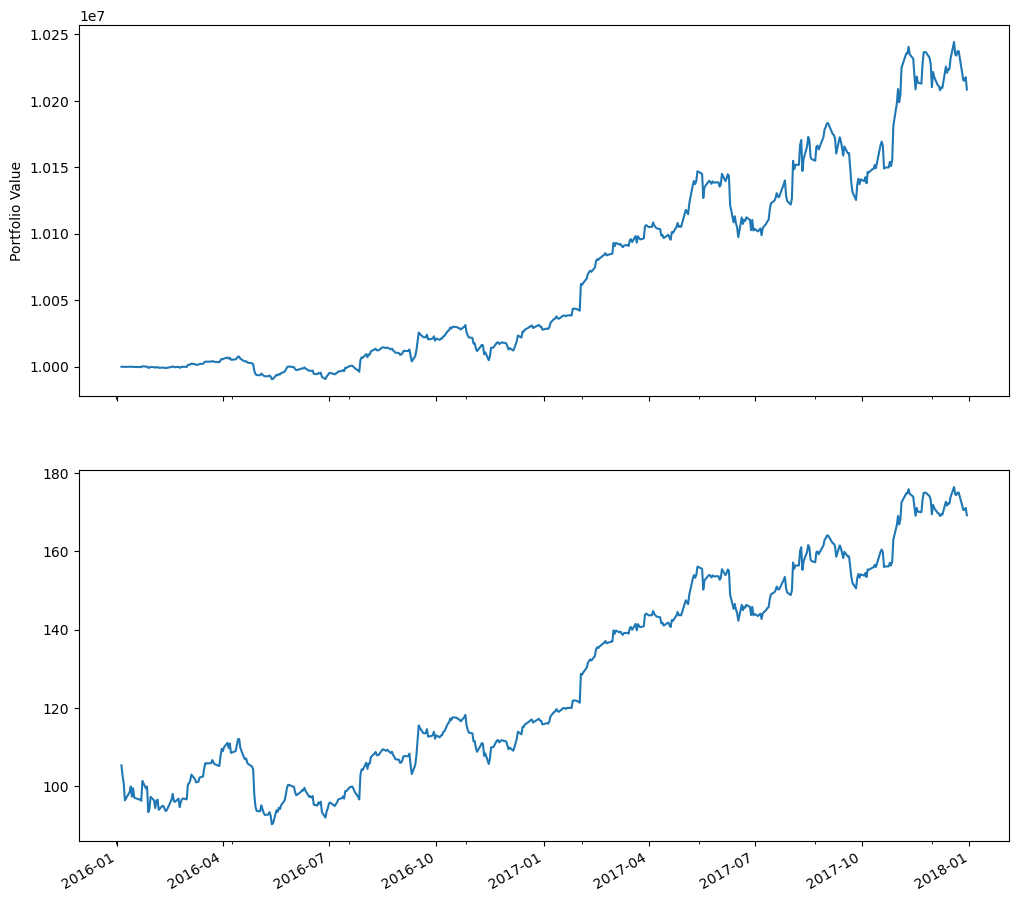

In [42]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
perf.AAPL.plot(ax=ax2)

## Jupyter notebook

Zipline provides an easy way to run your algorithm inside the Notebook without requiring you to use the CLI.

* To use it you have to write your algorithm in a cell and let Zipline know that it is supposed to run this algorithm. * This is done via the `%%zipline` IPython magic command that is available after you import zipline from within the IPython Notebook.
* This magic takes the same arguments as the command line interface described above.
* Thus to run the algorithm from above with the same parameters we just have to execute the following cell after importing zipline to register the magic.

In [43]:
%load_ext zipline


The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


* Note that we did not have to specify an input file as above since the magic will use the contents of the cell and look for your algorithm functions there.
* Also, instead of defining an output file we are specifying a variable name with `-o` that will be created in the name space and contain the performance DataFrame we looked at above.

In [44]:
%%zipline --start 2017-1-1 --end 2018-1-1 --no-benchmark -o dma.pickle

from zipline.api import symbol, order, record

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), "price"))

C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


,period_open,period_close,long_value,short_value,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2017-01-03 21:00:00+00:00,2017-01-03 14:31:00+00:00,2017-01-03 21:00:00+00:00,0.0,0.0,0.0,0.00000,0.0,0.00000,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...",[],...,None,NaN,NaN,0.000000e+00,0.000000,0.0,0.0,1,2017-01,0.000000e+00
2017-01-04 21:00:00+00:00,2017-01-04 14:31:00+00:00,2017-01-04 21:00:00+00:00,1160.2,0.0,1160.2,-0.59010,0.0,-1160.79010,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...","[{'amount': 10, 'dt': 2017-01-04 21:00:00+00:0...",...,None,-11.224972,-11.224972,-5.901000e-08,0.000116,0.0,0.0,2,2017-01,-5.901000e-08
2017-01-05 21:00:00+00:00,2017-01-05 14:31:00+00:00,2017-01-05 21:00:00+00:00,2332.2,0.0,2332.2,5.30695,0.0,-1166.69305,"[{'id': '69a8ab569c1b4aeaa6fa6a6be7a6e89b', 'd...","[{'amount': 10, 'dt': 2017-01-05 21:00:00+00:0...",...,None,7.685091,73.259866,-5.901000e-08,0.000233,0.0,0.0,3,2017-01,4.716850e-07
2017-01-06 21:00:00+00:00,2017-01-06 14:31:00+00:00,2017-01-06 21:00:00+00:00,3537.3,0.0,3537.3,25.40045,0.0,-1179.69955,"[{'id': '5bfb2f2228f84a648d907ebc09f00678', 'd...","[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",...,None,9.792562,405.098399,-5.901000e-08,0.000354,0.0,0.0,4,2017-01,3.011730e-06
2017-01-09 21:00:00+00:00,2017-01-09 14:31:00+00:00,2017-01-09 21:00:00+00:00,4759.6,0.0,4759.6,31.79505,0.0,-1190.50495,"[{'id': '3f445a715476479a911c06afa8d764f9', 'd...","[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",...,None,12.975325,744.845484,-5.901000e-08,0.000476,0.0,0.0,5,2017-01,6.191235e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,430524.6,0.0,430524.6,-0.88505,0.0,-1750.98505,"[{'id': '5b67c14cd90a4c2d85329961ddd5745b', 'd...","[{'amount': 10, 'dt': 2017-12-22 21:00:00+00:0...",...,None,1.515380,2.433444,-2.376199e-03,0.042794,0.0,0.0,247,2017-12,6.042334e-03
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,421307.9,0.0,421307.9,-10923.26285,0.0,-1706.56285,"[{'id': '58e1e5d7904b4da9a182cf71648c366f', 'd...","[{'amount': 10, 'dt': 2017-12-26 21:00:00+00:0...",...,None,1.195394,1.827033,-2.376199e-03,0.042794,0.0,0.0,248,2017-12,4.950008e-03
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,423088.0,0.0,423088.0,73.23700,0.0,-1706.86300,"[{'id': 'dfbee5cb6233442c8e02273c950f5786', 'd...","[{'amount': 10, 'dt': 2017-12-27 21:00:00+00:0...",...,None,1.194753,1.826047,-2.376199e-03,0.042794,0.0,0.0,249,2017-12,4.957332e-03
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,425989.2,0.0,425989.2,1189.53460,0.0,-1711.66540,"[{'id': 'a4568d3b17064c0b8b8ded2733dfb8de', 'd...","[{'amount': 10, 'dt': 2017-12-28 21:00:00+00:0...",...,None,1.220521,1.865935,-2.376199e-03,0.042794,0.0,0.0,250,2017-12,5.076285e-03


In [45]:
df = pd.read_pickle('dma.pickle')
df.head()

,period_open,period_close,long_value,short_value,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2017-01-03 21:00:00+00:00,2017-01-03 14:31:00+00:00,2017-01-03 21:00:00+00:00,0.0,0.0,0.0,0.00000,0.0,0.00000,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...",[],...,None,NaN,NaN,0.000000e+00,0.000000,0.0,0.0,1,2017-01,0.000000e+00
2017-01-04 21:00:00+00:00,2017-01-04 14:31:00+00:00,2017-01-04 21:00:00+00:00,1160.2,0.0,1160.2,-0.59010,0.0,-1160.79010,"[{'id': '5f06d0ed3cb544d38cb3608b10c8338d', 'd...","[{'amount': 10, 'dt': 2017-01-04 21:00:00+00:0...",...,None,-11.224972,-11.224972,-5.901000e-08,0.000116,0.0,0.0,2,2017-01,-5.901000e-08
2017-01-05 21:00:00+00:00,2017-01-05 14:31:00+00:00,2017-01-05 21:00:00+00:00,2332.2,0.0,2332.2,5.30695,0.0,-1166.69305,"[{'id': '69a8ab569c1b4aeaa6fa6a6be7a6e89b', 'd...","[{'amount': 10, 'dt': 2017-01-05 21:00:00+00:0...",...,None,7.685091,73.259866,-5.901000e-08,0.000233,0.0,0.0,3,2017-01,4.716850e-07
2017-01-06 21:00:00+00:00,2017-01-06 14:31:00+00:00,2017-01-06 21:00:00+00:00,3537.3,0.0,3537.3,25.40045,0.0,-1179.69955,"[{'id': '5bfb2f2228f84a648d907ebc09f00678', 'd...","[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",...,None,9.792562,405.098399,-5.901000e-08,0.000354,0.0,0.0,4,2017-01,3.011730e-06
2017-01-09 21:00:00+00:00,2017-01-09 14:31:00+00:00,2017-01-09 21:00:00+00:00,4759.6,0.0,4759.6,31.79505,0.0,-1190.50495,"[{'id': '3f445a715476479a911c06afa8d764f9', 'd...","[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",...,None,12.975325,744.845484,-5.901000e-08,0.000476,0.0,0.0,5,2017-01,6.191235e-06


## Data

* Zipline comes with a default bundle as well as the ability to register new bundles.
* To see which bundles we may be available, we may run the bundles command, for example:

In [46]:
!zipline bundles

csvdir <no ingestions>
quandl 2024-04-29 23:38:44.959191
quandl 2024-04-29 23:38:16.860245
quandl 2024-04-29 23:35:11.639644
quantopian-quandl <no ingestions>


### Ingesting Data from .csv Files

* Zipline provides a bundle called `csvdir`, which allows users to ingest data from .csv files. 
* The format of the files should be in `OHLCV` format, with dates, dividends, and splits.
* A sample is provided below.
* There are other samples for testing purposes in zipline/tests/resources/csvdir_samples

In [47]:
current_dir

WindowsPath('.')

In [67]:
data_dir = current_dir.absolute() / 'data_multi_factor' / 'AAPL.csv'
str(data_dir)

'G:\\My Drive\\Slate\\Notes_G\\Finance Job\\python for finance\\data_multi_factor\\AAPL.csv'

Once you have your data in the correct format, you can edit your `extension.py` file in `~/.zipline/extension.py` and import the `csvdir` bundle, along with `pandas`.

```
import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

start_session = pd.Timestamp('2012-1-3')
end_session = pd.Timestamp('2014-12-31')

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['daily'],
        'G:\\My Drive\\Slate\\Notes_G\\Finance Job\\python for finance\\data_multi_factor\\',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)
```

```!zipline ingest -b custom-csvdir-bundle```

```
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

start_session = pd.Timestamp('2021-08-03',).tz_localize('US/Eastern')
end_session = pd.Timestamp('2023-08-04',).tz_localize('US/Eastern')

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['minute'],
        "D://Users//Terence//ES_Trading//custom_bundles//minute//e_mini_sp_data.csv",
        ),
        calendar_name='CMES',
        start_session=start_session,
        end_session
```=end_session
)

#### My instructions

1. Open `C:\Users\akhan147\.zipline\extension.py`
2. Paste the above code
    3. Make sure `tz` argument is not given
4. Open `Anaconda Powershell`
5. Activate the environment
6. `cd C:\Users\akhan147\.zipline\`
7. Run `zipline bundles`
8. Run `zipline ingest -b custom-csvdir-bundle`
9. Check again by running `zipline bundles`

In [76]:
!zipline run --bundle custom-csvdir-bundle -f ./buyapple.py --start 2012-5-5 --end 2013-1-1 -o buyapple_out.pickle --no-benchmark


Figure(1800x800)


C:\Users\akhan147\Anaconda3\envs\tf-cpu10\lib\site-packages\zipline\finance\ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
[2024-06-14T20:23:00-0400-INFO][zipline.finance.metrics.tracker]
 Simulated 164 trading days
 first open: 2012-05-07 13:30:00+00:00
 last close: 2012-12-31 21:00:00+00:00


In [77]:
df = pd.read_pickle('buyapple_out.pickle')
df.head()

,period_open,period_close,ending_cash,net_leverage,starting_cash,gross_leverage,returns,ending_value,short_exposure,long_exposure,...,benchmark_volatility,period_label,trading_days,treasury_period_return,excess_return,max_leverage,max_drawdown,algo_volatility,sortino,sharpe
2012-05-07 20:00:00+00:00,2012-05-07 13:31:00+00:00,2012-05-07 20:00:00+00:00,10000000.00,0.000000,10000000.00,0.000000,0.000000e+00,0.00,0.0,0.00,...,NaN,2012-05,1,0.0,0.0,0.000000,0.000000e+00,NaN,NaN,NaN
2012-05-08 20:00:00+00:00,2012-05-08 13:31:00+00:00,2012-05-08 20:00:00+00:00,9999187.31,0.000081,10000000.00,0.000081,-1.000000e-07,811.69,0.0,811.69,...,0.0,2012-05,2,0.0,0.0,0.000081,-1.000000e-07,0.000001,-11.224972,-11.224972
2012-05-09 20:00:00+00:00,2012-05-09 13:31:00+00:00,2012-05-09 20:00:00+00:00,9998373.20,0.000163,9999187.31,0.000163,4.200000e-08,1626.22,0.0,1626.22,...,0.0,2012-05,3,0.0,0.0,0.000163,-1.000000e-07,0.000001,-5.315787,-4.207235
2012-05-10 20:00:00+00:00,2012-05-10 13:31:00+00:00,2012-05-10 20:00:00+00:00,9997557.17,0.000245,9998373.20,0.000245,2.840000e-07,2445.09,0.0,2445.09,...,0.0,2012-05,4,0.0,0.0,0.000245,-1.000000e-07,0.000003,17.938196,5.504448
2012-05-11 20:00:00+00:00,2012-05-11 13:31:00+00:00,2012-05-11 20:00:00+00:00,9996746.58,0.000324,9997557.17,0.000324,-1.732000e-06,3238.36,0.0,3238.36,...,0.0,2012-05,5,0.0,0.0,0.000324,-1.732000e-06,0.000013,-6.162681,-5.887018


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

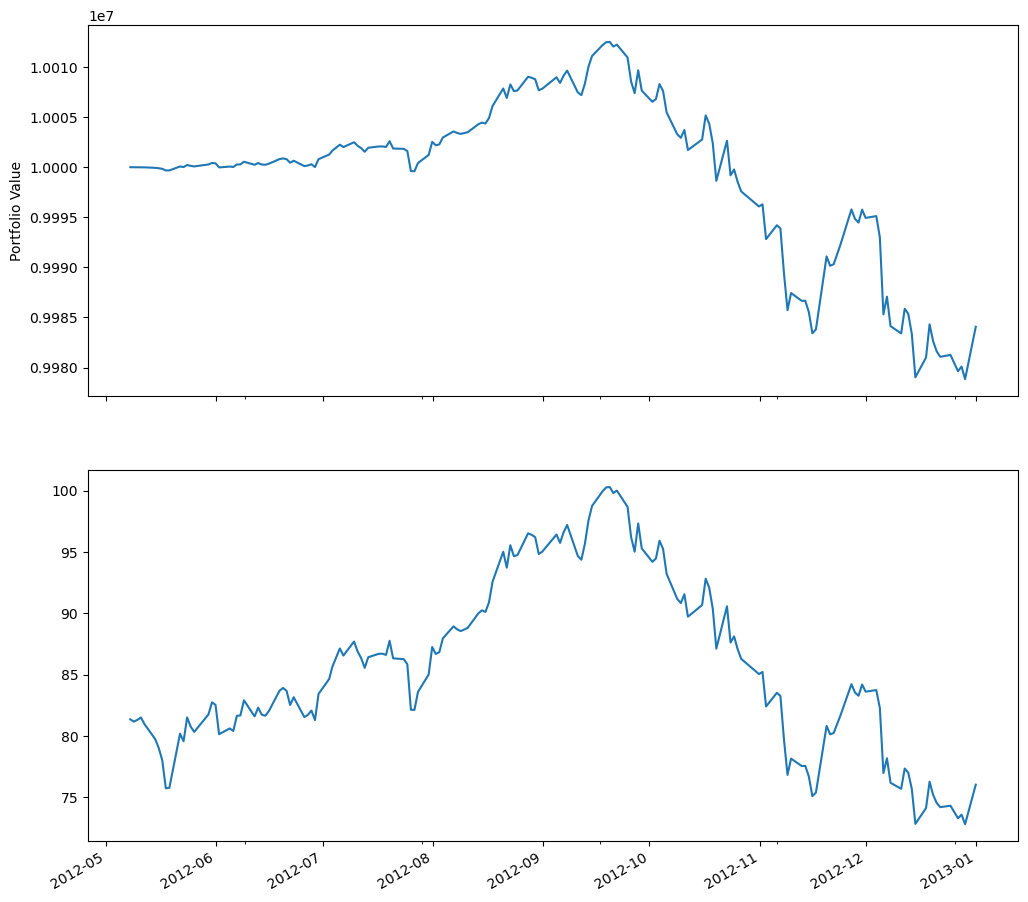

In [78]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
df.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
df.AAPL.plot(ax=ax2)